## Conic sections
   
These are the result of intersecting a plane with a double cone, as shown in the figure. The intersection is a 2 dimensional curve. The conic is the graph of a quadratic equation in 2 variables. The general form is
   
$$Ax^2 + B xy + Cy^2 + Dx+Ey + F=0$$
   
And the roots of this equation resolve to one of the conics, either a circle, ellipse, parabola, hyperbola, or a degenerate (point).
   
The equation can be put into matrix form, and is most convenient in a canonical form
   
$$\mathbf Q = \left(\begin{matrix} A & B/2 &D/2 \\B/2 & C&E/2 \\D/2 &E/2 &F\end{matrix}\right)$$
   
and the vectors (in homogeneous form) are
   
$$\mathbf p = \left(\begin{matrix} x \\ y \\ 1 \end{matrix}\right)$$
   
Then the equation to solve is 
$$ \mathbf p^T \mathbf Q \mathbf p = 0$$

The determinant of $Q$ is called $S = Det(Q)$ is a useful simplification variable. Also the 2x2 matrix 
   
   $$\mathbf Q_1 = \left(\begin{matrix} A & B/2  \\B/2 & C \end{matrix}\right)$$
   
Is solved for eigenvalues $\lambda_1$ and $\lambda_2$, then the quadratic formula is put into canonical form for the case of the ellipse and hyperbola after transforming x and y:
   
$$ \frac{x^2}{\left(\frac{-S}{\lambda_1^2\lambda_2}\right)}+\frac{y^2}{\left(\frac{-S}{\lambda_1\lambda_2^2}\right)}=1$$


The value of $B^2-4AC$ is called the discriminant and classifies the conic ...
   
1) $B^2-4AC < 0$ then the result is an ellipse   
2) $-4AC < 0$ i.e $B=0$ and $A=B$ results in a circle   
3) $B^2-4AC = 0$ parabola   
4) $B^2-4AC > 0$ hyperbola   
      
A value called the eccentricity is also used.

### General Polar Formula
   
$$ r = \frac{b^2}{a-e\cos(\theta)}$$

is a formula with a semi-major axis $a$ and semi-minor axis $b$. The quantity $e$ is called the eccentricity, and can be calculated from the general quadratic formula as 
   
$$e = \sqrt{ \frac{2W}{\eta(A+C) + W} } $$
   
where $W=\sqrt{(A-C)^2+B^2}$ and $\eta = 1$ if $Det(\mathbf Q) < 0 $ and $\eta = -1$ if $Det(\mathbf Q) > 0 $. The variable takes the inverse sign of the determinant.
   


In [57]:
# import some libraries
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib import pylab
from matplotlib.text import Annotation
from sympy.vector import *

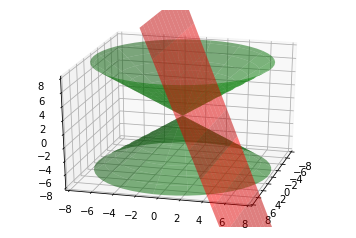

In [138]:
def plot_cone(ax):
    u = np.linspace(-8, 8, 50)
    v = np.linspace(0,2*np.pi, 50)
    U, V = np.meshgrid(u, v)
    x = U*np.cos(V)
    y = U*np.sin(V)
    z = U
    ax.plot_surface(x,y,z,rstride=3, cstride=3, color ='g',alpha=0.5, linewidth=0.5)

from __future__ import division
def plot_plane(p,n,ax):
    d = -float(p.dot(n))
    #point  = np.array([p.dot(e.i), p.dot(e.j), p.dot(e.k)])
    #normal = np.array([n.dot(e.i), n.dot(e.j), n.dot(e.k)])
    #d = -point.dot(normal)
    xx, yy = np.meshgrid(range(14), range(14))
    Nx= float(n.dot(e.i))
    Ny= float(n.dot(e.j))
    Nz= float(n.dot(e.k))
    z = (-Nx * xx - Ny * yy - d)*1. /Nz
    ax.plot_surface(xx, yy, z,rstride=1, cstride=1,color ='r',alpha=0.5, linewidth=0)    
#def plot_hyperbolic_cylinder(ax):
    
e = CoordSys3D('e')

p = 0.75*e.i + 4*e.j + 1.5*e.k
n = -e.i + e.j +0.25*e.k
n2 = e.k
n3 =  0.5*e.j + 0.125*e.k

n = n.normalize()
n3 = n3.normalize()
fig = plt.figure()
ax = fig.gca(projection='3d')

#plot_plane(p,n,ax)
#plot_plane(p,n2,ax)
plot_plane(p,n3,ax)
plot_cone(ax)
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
ax.set_zlim(-8, 8)

ax.view_init(25, 15)


In [58]:
# ax is the plot axis, 
# r is the curve, 
# t is the parameter in r, 
# tt is the numpy parameter range
def space_curve(ax, r, t, tt):
    fx = lambdify( t, r.dot(e.i), "numpy" )
    fy = lambdify( t, r.dot(e.j), "numpy" )
    fz = lambdify( t, r.dot(e.k), "numpy" )

    # plot the lambda funcs
    ax.plot(fx(tt),fy(tt),fz(tt))

The function below plots a general conic, with 

$$r(\theta) = \frac{b^2}{a+e \cos(\theta)}  $$

with the parametric equation vector equation
   
$$\mathbf r(\theta) = \frac{b^2}{a+e \cos(\theta)} \cos(\theta) \mathbf i + \frac{b^2}{a+e \cos(\theta)} \sin(\theta) \mathbf j $$

The symbols $a,b,e$ determine the character of the curve, the symbol $e$ is the *ecccentricity* and is used to define
the type of curve.   
If $e=0$ the curve is a circle   
If $ 0 < e < 1$ the curve is an ellipse   
If $e = 1 $ the curve is a parabola   
If $e > 1 $ the curve is a hyperbola   

The coefficients $a$ and $b$ are called the semi-major axis and the semi-minor axis. 

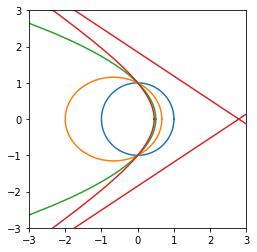

In [72]:

def plot_conic(aa,bb,ee,theta,ax):
    t = symbols('t')
    x1 =  bb**2*cos(t)/(aa+ee*cos(t))
    y1 =  bb**2*sin(t)/(aa+ee*cos(t)) 
    fx = lambdify( t, x1, "numpy" )
    fy = lambdify( t, y1, "numpy" )
    ax.plot(fx(theta), fy(theta), label='parametric curve')


fig = plt.figure()
ax = fig.gca()
theta = np.linspace(0, 2 * np.pi, 100)

# circle
#  eccentricity = 0 
plot_conic(1,1,0,theta,ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# ellipse
#  0 < eccentricity < 1 
plot_conic(1,1,0.5,theta,ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# parabola
#  eccentricity = 1 
plot_conic(1,1, 1,theta,ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# hyperbola
#  eccentricity > 1 
plot_conic(1,1,1.2,theta,ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

plt.axes().set_aspect('equal')

A useful technique for computing conics is via Rodrigue's formula for rotations (wikipedia). To rotate a vector $\mathbf v$ about an arbitrary axis $\mathbf k$ by a specified angle $\theta$.

$$\mathbf v_{rot} = \mathbf v\cos\theta + (\mathbf k\times \mathbf v)\sin\theta + \mathbf k (\mathbf k\cdot\mathbf v)(1-\cos\theta)$$   
   
The matrix notation is as follows, first the $\mathbf k$ vector is put into matrix notation as
   
$$\mathbf K = \left(\begin{matrix}0&-k_z&k_y\\k_z&0&-k_x\\-k_y&k_x&0\end{matrix}\right)$$
   
then
   
$$ \mathbf K\mathbf v = \mathbf k \times \mathbf v$$
   
and 
   
   $$\mathbf K(\mathbf K \mathbf v) = \mathbf K^2\mathbf v = \mathbf k\times(\mathbf k\times \mathbf v)$$

then the formula becomes
   
$$\mathbf v_{rot} = \mathbf v + \mathbf K\mathbf v \sin\theta + \mathbf K^2\mathbf v(1-\cos\theta)$$
   
or the rotation matrix is
   
$$ \mathbf R = \mathbf I + (\sin\theta)\mathbf K + (1-\cos\theta)\mathbf K^2 $$

In [75]:


def Rotate_Vector_About_Vector(v,k, theta):
    return v *cos(theta) + k.cross(v)*sin(theta) + (1-cos(theta))*k*(k.dot(v))

def Rotation_Matrix_axis_from_vector(k,theta):
    K = Matrix([[0,-k.dot(e.k),k.dot(e.j) ],[k.dot(e.k),0,-k.dot(e.i)],[-k.dot(e.j),k.dot(e.i),0]])
    I = Matrix([1,0,0],[0,1,0],[0,0,1])
    return I + sin(theta)*K + (1-cos(theta))*K*K

def Rotation_Matrix_axis_from_components(kx,ky,kz,theta):
    K = Matrix([[0,-kz, ky ],[kz,0,-kx],[-ky,kx,0]])
    I = Matrix([1,0,0],[0,1,0],[0,0,1])
    return I + sin(theta)*K + (1-cos(theta))*K*K

def Compute_Rotation_To_Z_Axis(v):
    z_axis = 1*e.k
    dot_v = z_axis.dot(v)
    v_mag = v.magnitude()
    return acos(dot_v/v_mag)

def Compute_Axis_To_Rotate_to_Z_Axis(v):
    z_axis = 1*e.k
    return v.cross(z_axis)


Where I have added two functions for computing the axis to rotate to the z axis via a cross product and the angle from the dot product. This will making solving the equations easier as then I just set the z coordinate equal to zero and the resulting equations describe the locus of the conic section. 


In [73]:
# define some useful functions and objects

########################################
# 1) Fancy Arrow for plotting vectors
# http://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
# posted this fancy arrow object
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
########################################        
# 2) Annotate 3D functions 
# also from stackoverflow
class Annotation3D(Annotation):
    '''Annotate the point xyz with text s'''

    def __init__(self, s, xyz, *args, **kwargs):
        Annotation.__init__(self,s, xy=(0,0), *args, **kwargs)
        self._verts3d = xyz        

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.xy=(xs,ys)
        Annotation.draw(self, renderer)

def annotate3D(ax, s, *args, **kwargs):
    '''add anotation text s to to Axes3d ax'''

    tag = Annotation3D(s, *args, **kwargs)
    ax.add_artist(tag)
    
    
########################################    
# 3) Function to plot the cartesian basis ijk
def PlotBasisCartesian():
    a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    a = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a)
    a = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=5, lw=2, arrowstyle="-|>", color="k")
    ax.add_artist(a) 
    annotate3D(ax, r'$ \hat{i}$', xyz=(1,0,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
    annotate3D(ax, r'$ \hat{j}$', xyz=(0,1,0), fontsize=30, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom') 
    annotate3D(ax, r'$ \hat{k}$', xyz=(0,0,1), fontsize=30, xytext=(-3,4),
                   textcoords='offset points', ha='right',va='bottom') 
    
    
########################################
# 4) Draw an arrow in 3d space from origin o to point v1, with name and color    
def plot_arrow(o, v1, e, name,col):
        LX=[float(N(o.dot(e.i))), float(N(v1.dot(e.i) + o.dot(e.i)))]
        LY=[float(N(o.dot(e.j))), float(N(v1.dot(e.j) + o.dot(e.j)))]
        LZ=[float(N(o.dot(e.k))), float(N(v1.dot(e.k) + o.dot(e.k)))]
        a = Arrow3D(LX, LY, LZ, mutation_scale=5, lw=2, arrowstyle="-|>", color=col)
        ax.add_artist(a)
        xyz_ = (LX[1], LY[1], LZ[1])
        annotate3D(ax, name, xyz=xyz_, fontsize=17, xytext=(-3,4),
               textcoords='offset points', ha='right',va='bottom')

########################################
# 5) plot 3 basis vectors at a point o         
# requires plot_arrow
def plot_basis(o,v1,v2,v3,e,col):
    plot_arrow(o,v1,e,r'$ \hat{e_1}$',col)
    plot_arrow(o,v2,e,r'$ \hat{e_2}$',col)
    plot_arrow(o,v3,e,r'$ \hat{e_3}$',col)
    
########################################
# 5) plot frenet frame given T and N at point o    
def plot_frenet_frame(o,T,N,e,col):
    plot_arrow(o,T,e,r'$ \hat{T}$',col)
    plot_arrow(o,N,e,r'$ \hat{N}$',col)
    B = T.cross(N)
    B = B/ B.magnitude()
    plot_arrow(o,B,e,r'$ \hat{B}$',col)
    
########################################
# 7) Plot surface vectors given xu and xv
def plot_surface_vectors(o,xu,xv,e,col):
    plot_arrow(o,xu,e,r'$ \hat{x}_u$',col)
    plot_arrow(o,xv,e,r'$ \hat{x}_v$',col)
    N = xu.cross(xv)
    N = N/ N.magnitude()
    plot_arrow(o,N,e,r'$ \hat{N}$',col)
    


## Quadratic Forms, Conics and Conic sections
   
A general quadratic form can be written as
   
$$ Ax^2+By^2 + Cz^2 + 2Dxy + 2Eyz + 2Fxz + 2Gx + 2Hy + 2Jz + K = 0 $$

or in matrix form as
   
$$ \mathbf p^T \mathbf Q \mathbf p = 0 $$
   
with the variables 
   
$$ \mathbf Q = \left(\begin{matrix} A & D  &F & G \\ D & B  & E&H \\ F&E  &C &J \\ G&  H& J&K \end{matrix} \right)$$
   
and 
   
$$\mathbf p = \left( \begin{matrix}x \\ y \\ z \\ 1\end{matrix} \right)$$

In [55]:
from sympy import *
init_printing(use_latex = True)
A,B,C,D,E,F,G,H,J,K = symbols('A,B,C,D,E,F,G,H,J,K')
x,y,z = symbols('x,y,z')
Q = Matrix([[A,D,F,G],[D,B,E,H],[F,E,C,J],[G,H,J,K]])
p = Matrix([x,y,z,1])
Q

⎡A  D  F  G⎤
⎢          ⎥
⎢D  B  E  H⎥
⎢          ⎥
⎢F  E  C  J⎥
⎢          ⎥
⎣G  H  J  K⎦

In [56]:
expand(p.T * Q * p)

⎡   2      2      2                                                          ⎤
⎣A⋅x  + B⋅y  + C⋅z  + 2⋅D⋅x⋅y + 2⋅E⋅y⋅z + 2⋅F⋅x⋅z + 2⋅G⋅x + 2⋅H⋅y + 2⋅J⋅z + K⎦

The matrix $\mathbf Q$ completely characterizes a quadric surface.

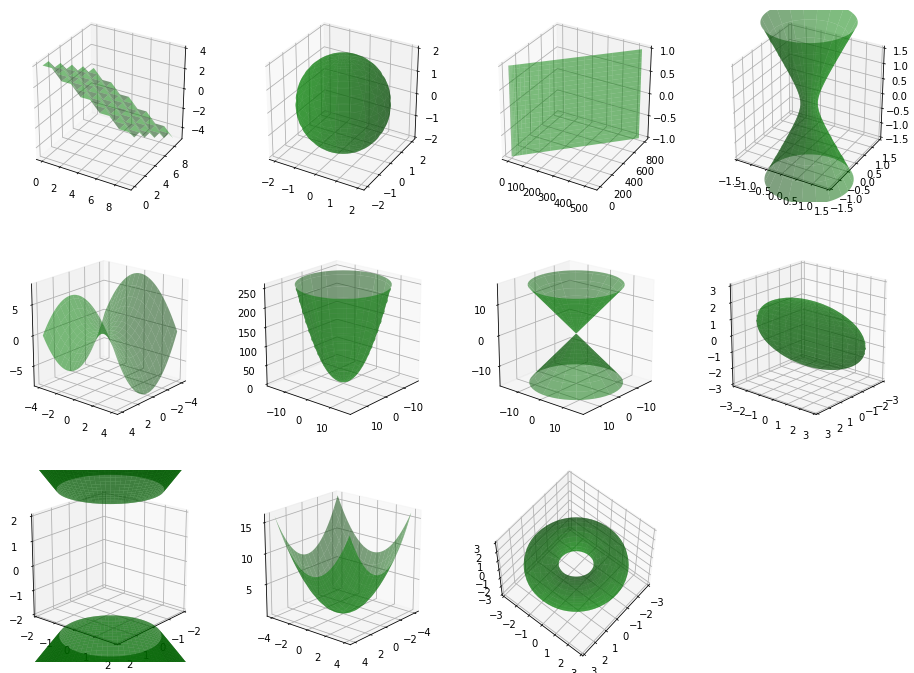

In [60]:
# Simple data to display in various forms
def plot_plane(ax):
    point  = np.array([1, 2, 3])
    normal = np.array([1, 1, 2])
    d = -point.dot(normal)
    xx, yy = np.meshgrid(range(10), range(10))
    z = (-normal[0] * xx - normal[1] * yy - d) /normal[2]
    ax.plot_surface(xx, yy, z,color ='g',alpha=0.5, linewidth=0.5)
    
def plot_sphere_surface(radius, ax):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x,y,z,rstride =5,
        cstride = 5, color ='g',alpha=0.5, linewidth=0.5)
    
def plot_ellipsoid(r1, r2, r3, ax):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r1 * np.outer(np.cos(u), np.sin(v))
    y = r2 * np.outer(np.sin(u), np.sin(v))
    z = r3 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x,y,z,rstride =5,
        cstride = 5, color ='g',alpha=0.5, linewidth=0.5)
    
def plot_cylinder_surface(radius, ax):
    theta = np.linspace(0, 2 * np.pi, 100)
    Z = np.linspace(-1, 1, 100)
    t, theta2 = np.meshgrid(Z, theta)
    x =radius * np.cos(theta2)
    y = radius * np.sin(theta2)
    z = t
    # plot the tube
    ax.plot_surface(x, y, z, rstride =5,
        cstride = 5, color ='g',alpha=0.5, linewidth=0.5)
    
def plot_elliptic_cylinder_surface(r1,r2, ax):
    theta = np.linspace(0, 2 * np.pi, 100)
    Z = np.linspace(-1, 1, 100)
    t, theta2 = np.meshgrid(Z, theta)
    x =r1 * np.cos(theta2)
    y = r2 * np.sin(theta2)
    z = t
    # plot the tube
    ax.plot_surface(x, y, z, rstride =5,
        cstride = 5, color ='g',alpha=0.5, linewidth=0.5)
     
def plot_hyperboloid_surface(radius, ax):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(-3*np.pi/4, 3*np.pi/4, 100)
    x = radius * np.outer(np.cos(u), np.cosh(v))
    y = radius * np.outer(np.sin(u), np.cosh(v))
    z = 2*radius * np.outer(np.ones(np.size(u)), np.sinh(v))
    ax.plot_surface(x,y,z,rstride =5,
        cstride = 5, color ='g',alpha=0.5, linewidth=0.5)
    
def plot_hyperbolic_cylinder_surface(r1,r2, ax):
    theta = np.linspace(0, 2 * np.pi, 100)
    Z = np.linspace(-1, 1, 100)
    t, theta2 = np.meshgrid(Z, theta)
    x = r1 * np.sinh(theta2)
    y = r2 * np.cosh(theta2)
    z = t
    # plot the tube
    ax.plot_surface(x, y, z, rstride =5,
        cstride = 5, color ='g',alpha=0.5, linewidth=0.5)
    #F.colorbar(S, shrink=0.5)  
    
def plot_parabolic_cylinder_surface(radius, ax):
    XR = np.arange(-1, 1, 0.01)
    ZR = np.arange(-1, 1, 0.01)
    X, Z = np.meshgrid(XR, ZR)
    Y = X**2

    S = ax.plot_surface(X, Y, Z, color ='g',alpha=0.5, linewidth=0.5)

def plot_hyperboloid_2sheet(radius,ax):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(-np.pi, np.pi, 100)
    X = radius * np.outer(np.cos(u), np.cosh(v))
    Y = radius * np.outer(np.sin(u), np.cosh(v))
    Z = np.sqrt(radius*(X**2 + Y**2) +1)
    ax.plot_surface(X, Y, Z, rstride =1,
        cstride = 1,color ='g',alpha=0.5, linewidth=0.5)
    ax.plot_surface(X, Y, -Z, rstride =1,
        cstride = 1,color ='g',alpha=0.5, linewidth=0.5)
    
def plot_hyperbolic_paraboloid(ax):
    u = np.linspace(-4, 4, 50)
    v = np.linspace(-4, 4, 50)
    x = u
    y = v
    U, V = np.meshgrid(u, v)
    z =0.5*(U**2 - V**2)
    ax.plot_surface(U,V,z,rstride=3, cstride=3, color ='g',alpha=0.5, linewidth=0.5)
    
def plot_elliptic_paraboloid(ax):
    u = np.linspace(-4, 4, 50)
    v = np.linspace(-4, 4, 50)
    x = u
    y = v
    U, V = np.meshgrid(u, v)
    z =0.5*(U**2 + V**2)
    ax.plot_surface(U,V,z,rstride=3, cstride=3, color ='g',alpha=0.5, linewidth=0.5)

def plot_paraboloid(ax):
    u = np.linspace(0, 16, 50)
    v = np.linspace(0,2*np.pi, 50)
    U, V = np.meshgrid(u, v)
    x = U*np.cos(V)
    y = U*np.sin(V)
    z = U**2
    ax.plot_surface(x,y,z,rstride=3, cstride=3, color ='g',alpha=0.5, linewidth=0.5)
    
def plot_cone(ax):
    u = np.linspace(-16, 16, 50)
    v = np.linspace(0,2*np.pi, 50)
    U, V = np.meshgrid(u, v)
    x = U*np.cos(V)
    y = U*np.sin(V)
    z = U
    ax.plot_surface(x,y,z,rstride=3, cstride=3, color ='g',alpha=0.5, linewidth=0.5)

#def plot_hyperbolic_cylinder(ax):
    

fig = plt.figure(figsize=(16, 12))

ax = fig.add_subplot(3, 4, 1, projection='3d')
plot_plane(ax)

ax = fig.add_subplot(3, 4, 2, projection='3d')
plot_sphere_surface(2, ax)


ax = fig.add_subplot(3, 4, 3, projection='3d')
plot_hyperbolic_cylinder_surface(2,3, ax)


ax = fig.add_subplot(3, 4, 4, projection='3d')
plot_hyperboloid_surface(0.25, ax)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

ax = fig.add_subplot(3, 4, 5, projection='3d')
plot_hyperbolic_paraboloid( ax)
ax.view_init(20, 40)

ax = fig.add_subplot(3, 4, 6, projection='3d')
plot_paraboloid( ax)
ax.view_init(20, 40)

ax = fig.add_subplot(3, 4, 7, projection='3d')
plot_cone( ax)
ax.view_init(20, 40)

ax = fig.add_subplot(3, 4, 8, projection='3d')
plot_ellipsoid(1,4,2, ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.view_init(20, 40)

ax = fig.add_subplot(3, 4, 9, projection='3d')
plot_hyperboloid_2sheet(2, ax)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.view_init(20, 40)

ax = fig.add_subplot(3, 4, 10, projection='3d')
plot_elliptic_paraboloid( ax)

ax.view_init(20, 40)

ax = fig.add_subplot(3, 4, 11, projection='3d')
plot_torus( ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.view_init(60, 40)
